In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('./data/stud.csv')

In [80]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## *Data Checks to perform*

In [81]:
def df_info(df):
    print(f"Data Shape: {df.shape}")
    df_info = pd.DataFrame(df.dtypes, columns=['dtype'])
    df_info = df_info.reset_index()
    df_info['Name'] = df_info['index']
    df_info = df_info[['Name', 'dtype']]
    df_info['Missing Values'] = df.isnull().sum().values
    df_info['% Missing'] = ((df.isnull().sum().values / len(df)) * 100).round(2)
    df_info['Unique Values'] = df.nunique().values
    df_info['First Value'] = df.loc[0].values
    return df_info

In [82]:
df_info(df)

Data Shape: (1000, 8)


,Name,dtype,Missing Values,% Missing,Unique Values,First Value
0,gender,object,0,0.0,2,female
1,race_ethnicity,object,0,0.0,5,group B
2,parental_level_of_education,object,0,0.0,6,bachelor's degree
3,lunch,object,0,0.0,2,standard
4,test_preparation_course,object,0,0.0,2,none
5,math_score,int64,0,0.0,81,72
6,reading_score,int64,0,0.0,72,72
7,writing_score,int64,0,0.0,77,74


In [ ]:
numerical = df.select_dtypes(include=[np.number])
numerical.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [84]:
category = df.select_dtypes(include=[object])
category.describe()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


## *Dataset information*

<Axes: ylabel='count'>

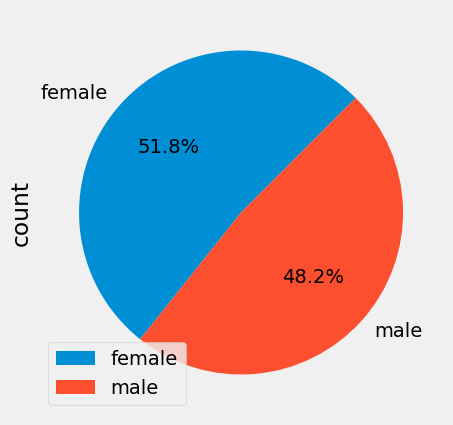

In [126]:
# gender : sex of students
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=45, shadow=False, legend=True, fontsize=14, figsize=(10, 5))

<Axes: xlabel='race_ethnicity'>

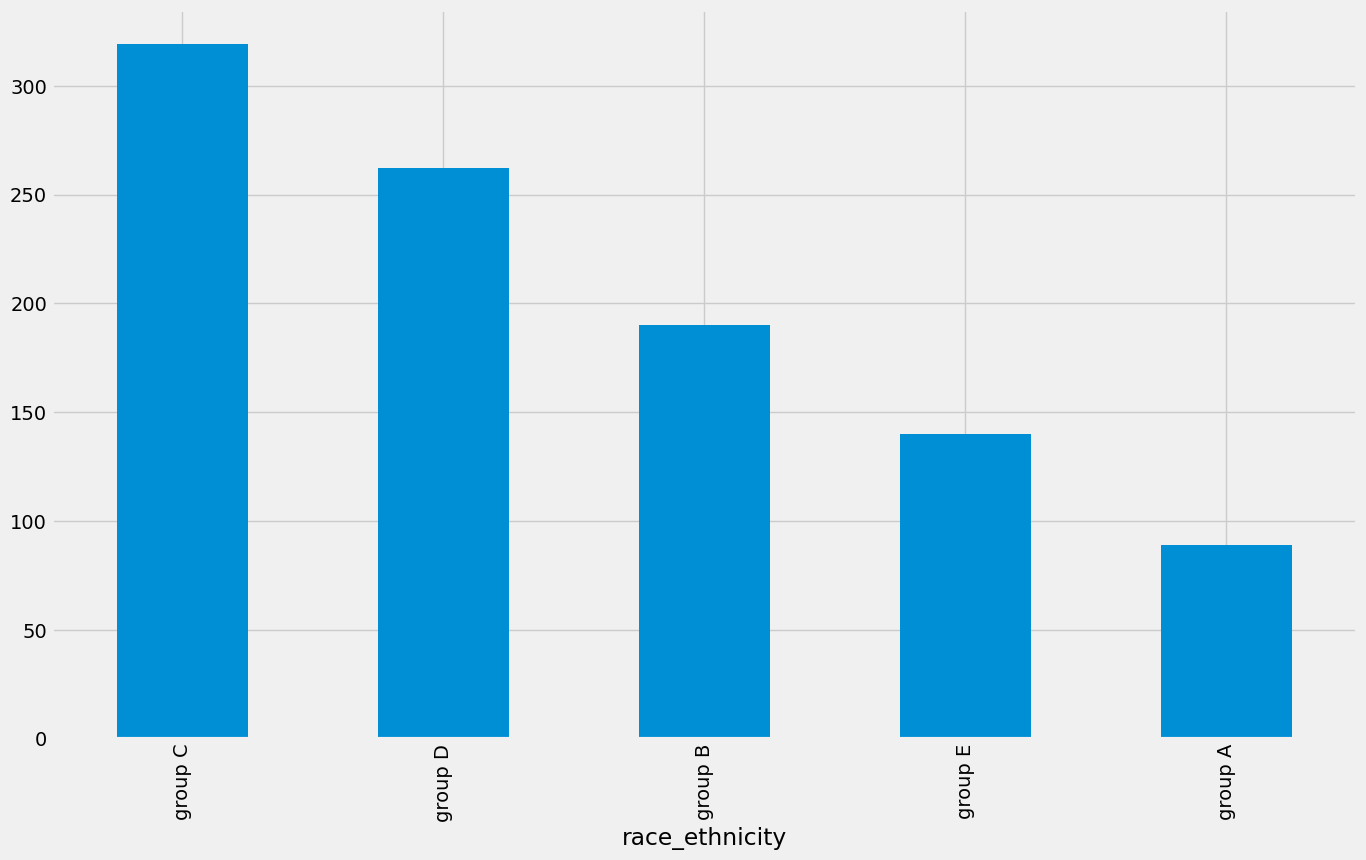

In [86]:
# race/ethnicity : ethnicity of students
df['race_ethnicity'].value_counts().plot(kind='bar')

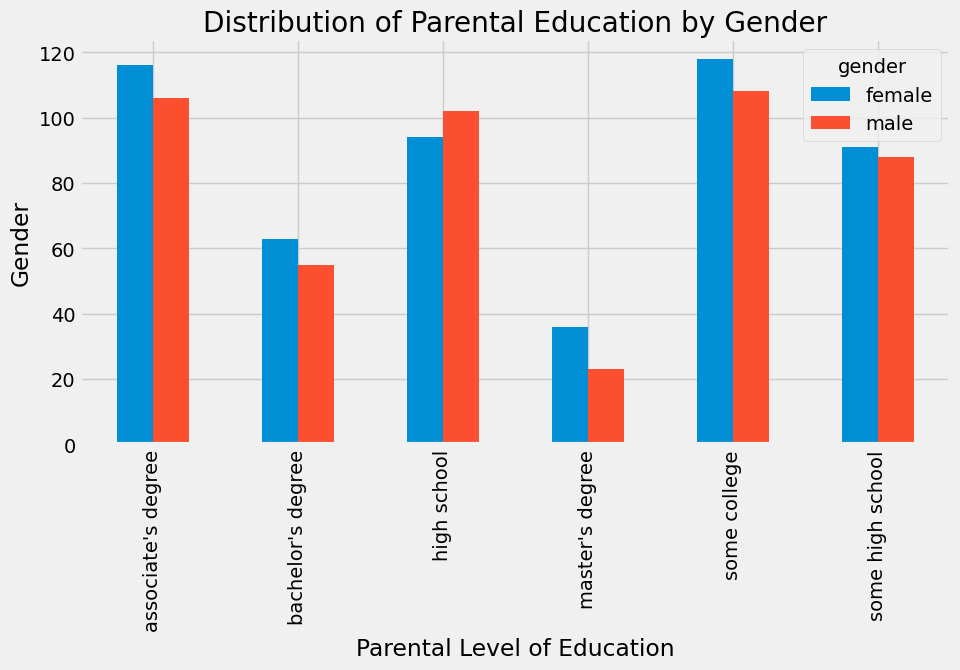

In [87]:
# distribution of parental education levels by gender
edu_group = df.groupby('parental_level_of_education')['gender'].value_counts().unstack()
edu_group.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Parental Level of Education')
plt.ylabel('Gender')
plt.title('Distribution of Parental Education by Gender')
plt.show()

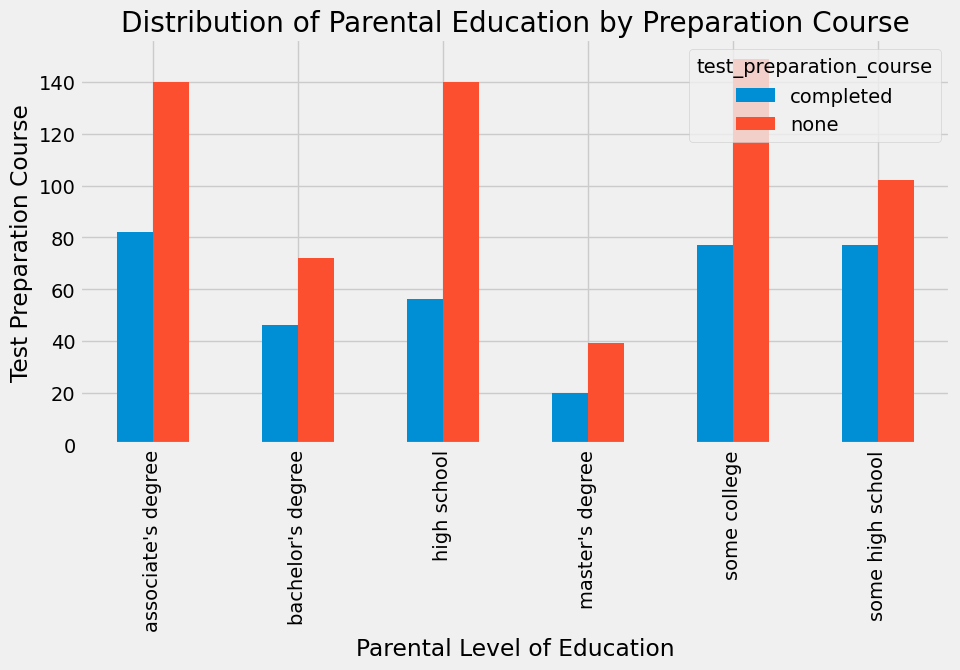

In [ ]:
prep_edu = df.groupby('parental_level_of_education')['test_preparation_course'].value_counts().unstack()
prep_edu.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Parental Level of Education')
plt.ylabel('Test Preparation Course')
plt.title('Distribution of Parental Education by Preparation Course')
plt.show()

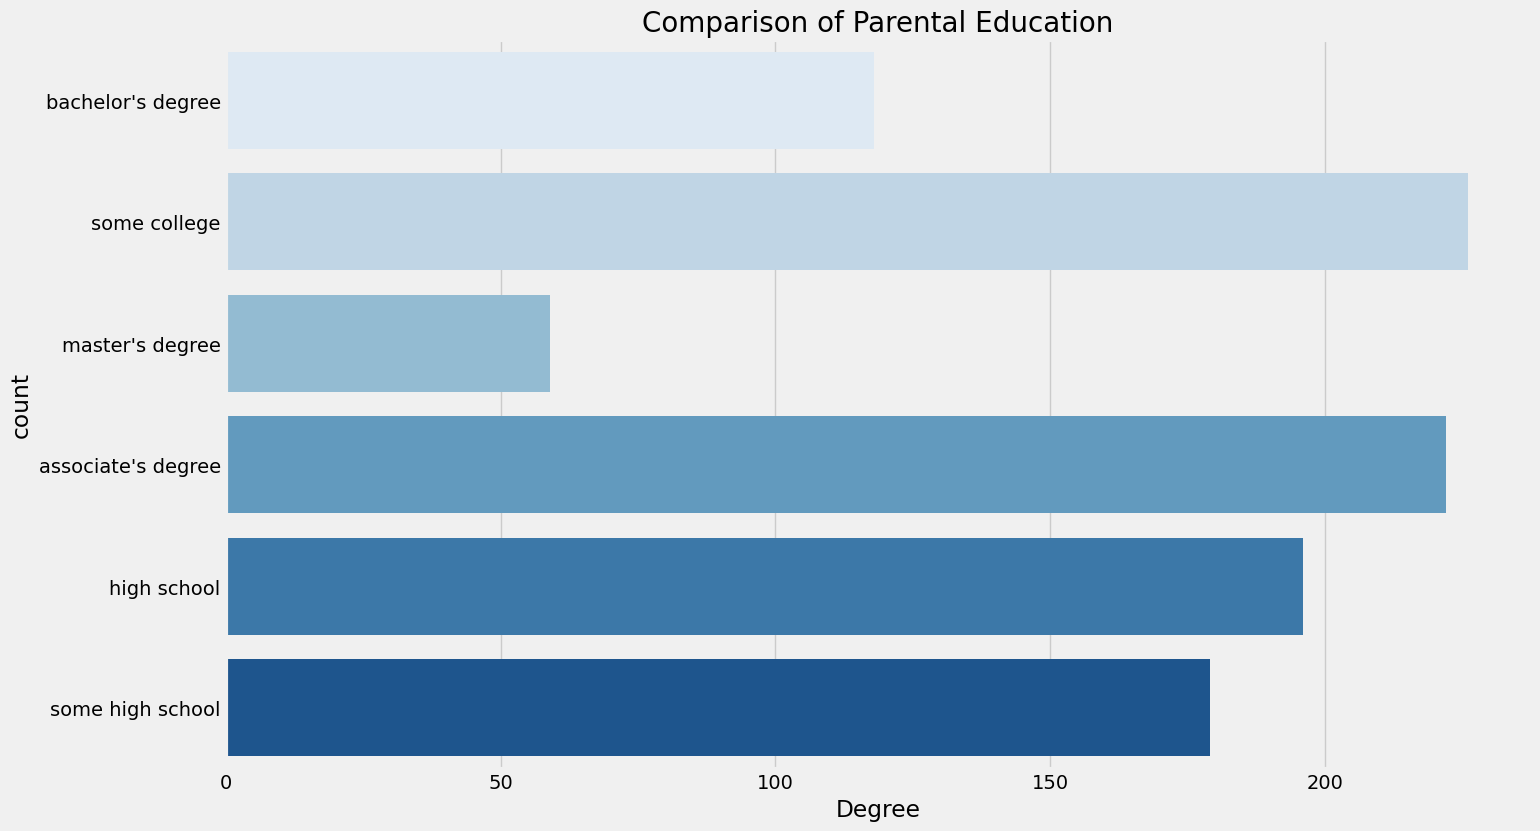

In [118]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

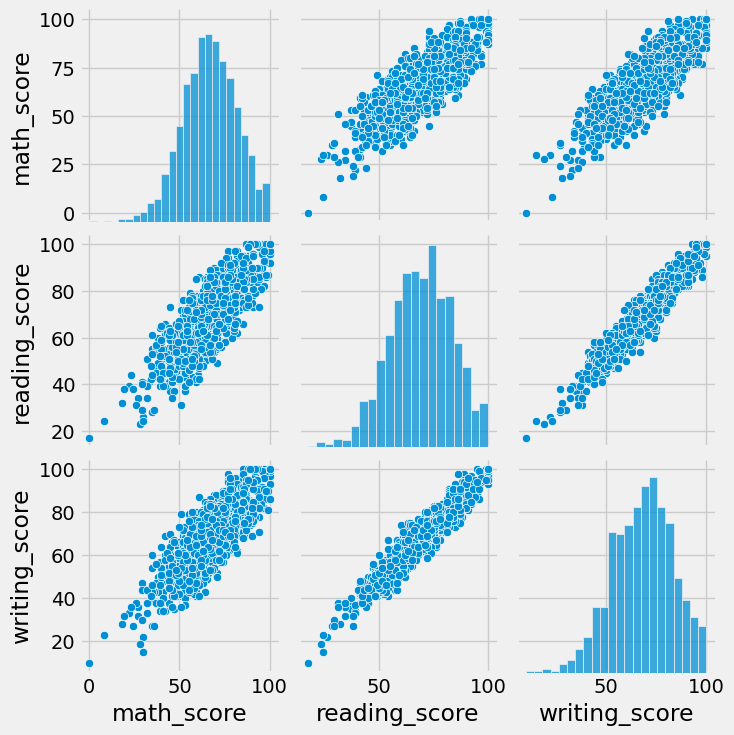

In [89]:
sns.pairplot(numerical)

<Axes: >

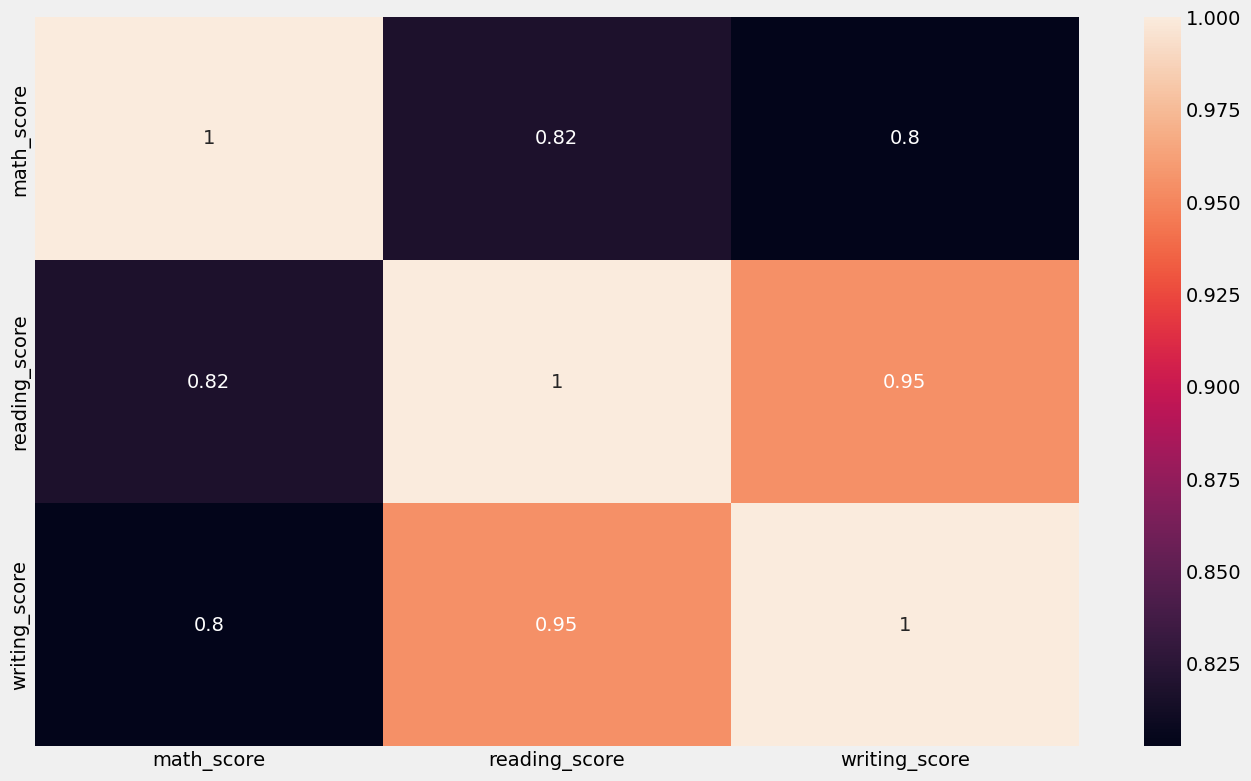

In [90]:
sns.heatmap(numerical.corr(), annot=True)

In [ ]:
gender_group_df  = df.groupby('gender').apply(lambda x: x.select_dtypes(include=[np.number]))
gender_group = gender_group_df.groupby('gender').mean()

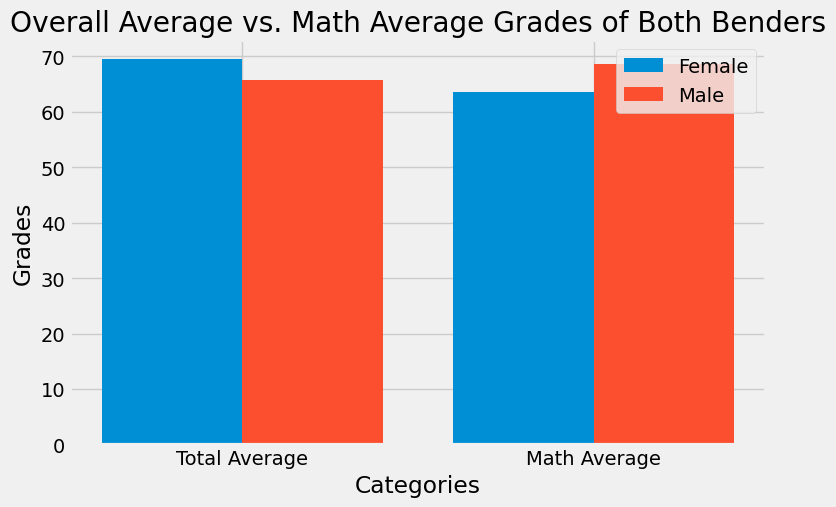

In [ ]:
plt.figure(figsize=(8, 5))

X = ['Total Average', 'Math Average']

female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, female_scores, 0.4, label='Female')
plt.bar(X_axis + 0.2, male_scores, 0.4, label='Male')

plt.xticks(X_axis, X)
plt.xlabel("Categories")
plt.ylabel("Grades")
plt.title("Overall Average vs. Math Average Grades of Both Benders")
plt.legend()
plt.show()

On average, female students have a better overall grade than male students.

Where male students performed better in math.

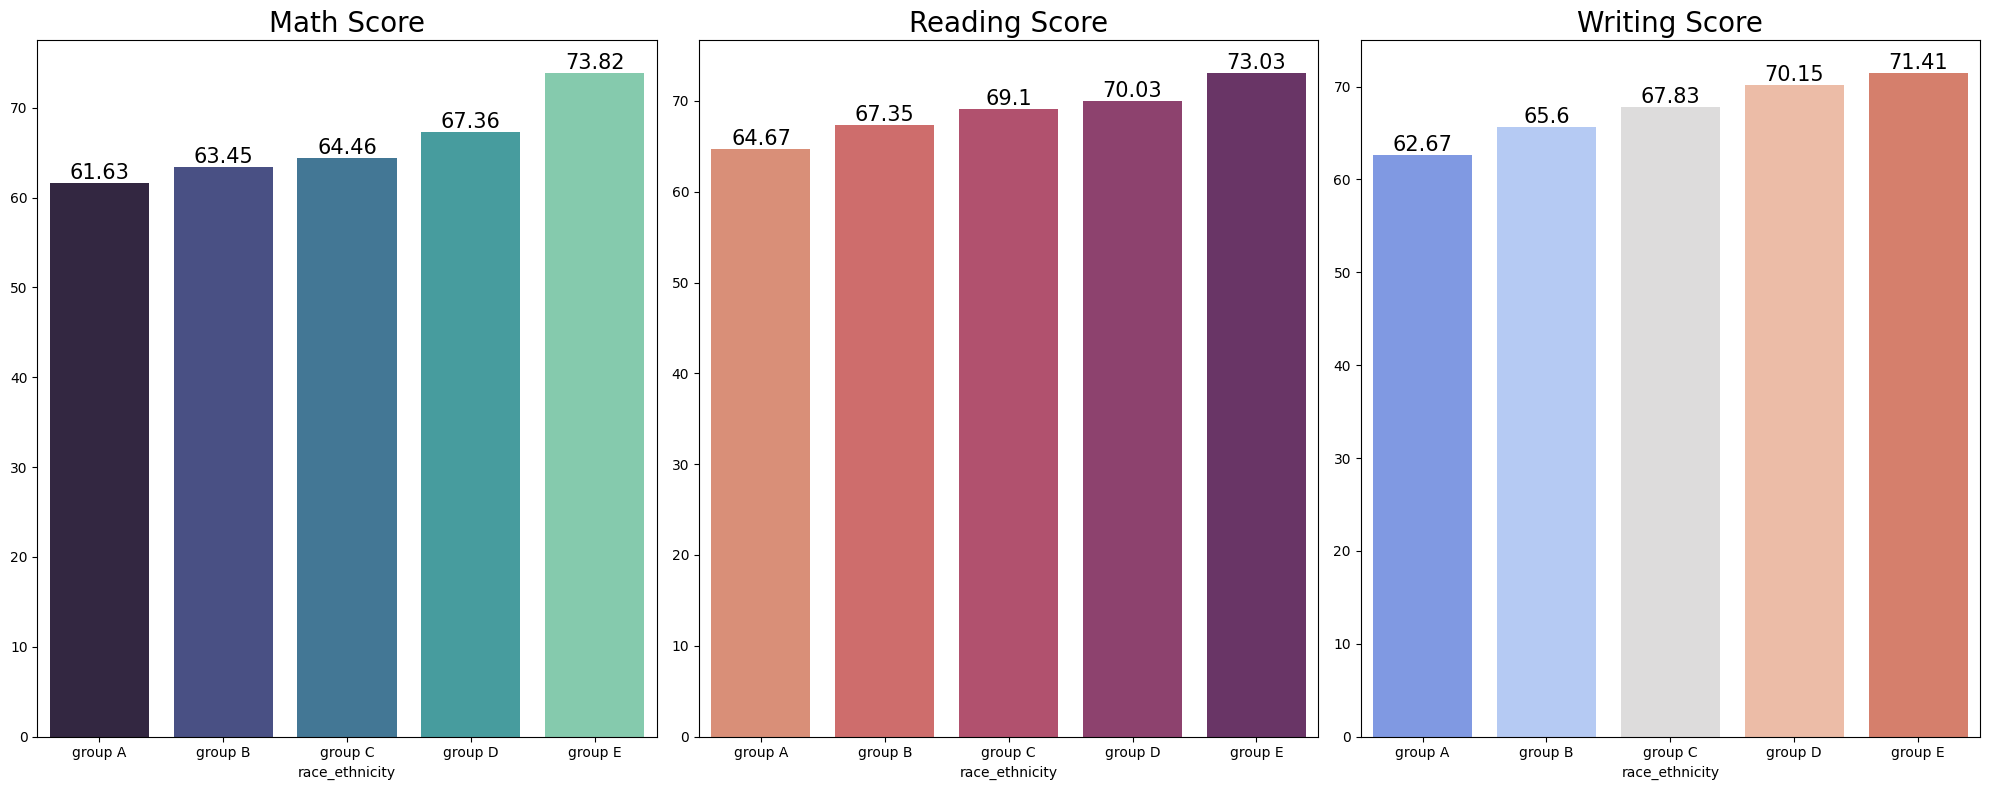

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scores_by_race(df):
    """Create bar plots for math, reading, and writing scores by race/ethnicity."""
    group_data = df.groupby('race_ethnicity')
    subjects = ['math_score', 'reading_score', 'writing_score']
    palettes = ['mako', 'flare', 'coolwarm']
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    for ax, subject, palette in zip(axes, subjects, palettes):
        scores = group_data[subject].mean().round(2)
        sns.barplot(x=scores.index, y=scores.values, palette=palette, ax=ax)
        ax.set_title(subject.replace('_', ' ').title(), size=20)
        
        for container in ax.containers:
            ax.bar_label(container, color='black', size=15)
    
    plt.tight_layout()
    return fig, axes


fig, axes = plot_scores_by_race(df)
plt.show()

In [47]:
# Unique Values in Categorical Columns
for cat in category:
    unique_values = df[cat].unique()
    print(f"\nUnique values in '{cat}':\n{unique_values}\n{'='*50}")


Unique values in 'gender':
['female' 'male']

Unique values in 'race_ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E']

Unique values in 'parental_level_of_education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in 'lunch':
['standard' 'free/reduced']

Unique values in 'test_preparation_course':
['none' 'completed']


In [101]:
# Adding columns: "Total Score" and "Average"
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = (df['total_score'] / 3).round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


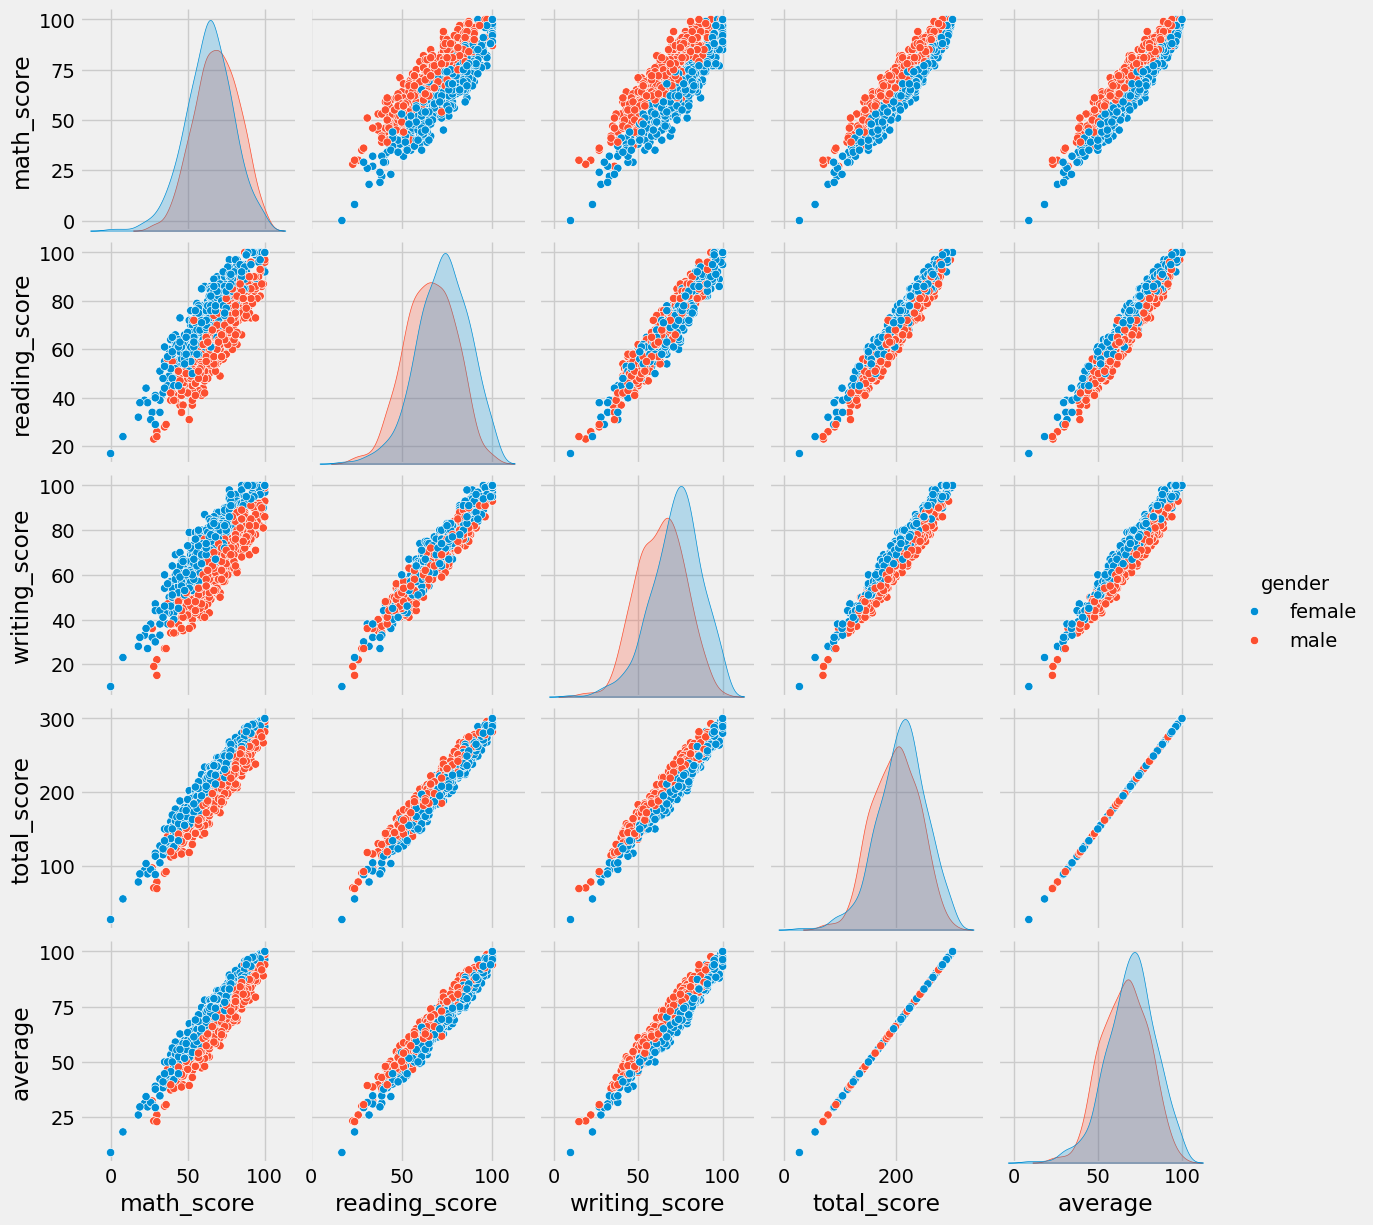

In [120]:
sns.pairplot(df,hue='gender')
plt.show()

<Axes: >

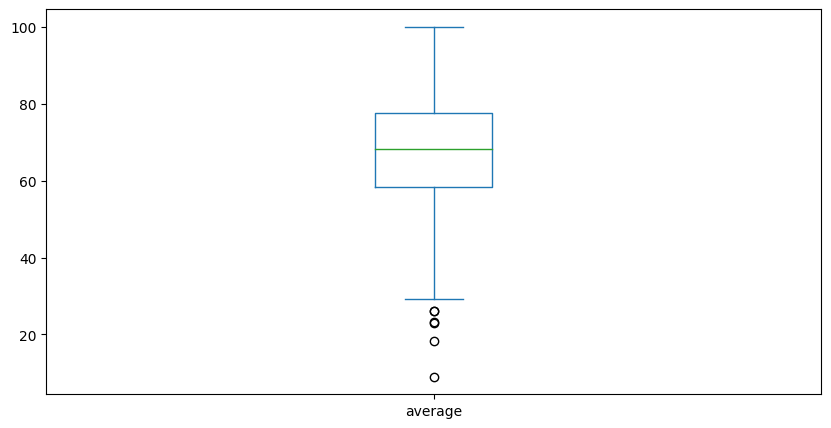

In [54]:
df['average'].sort_values().plot(kind='box', figsize=(10, 5))

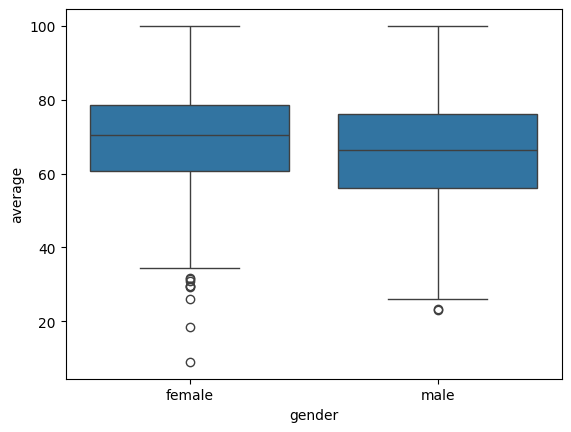

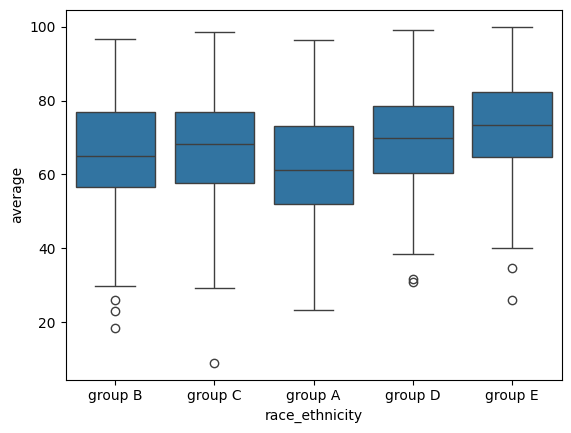

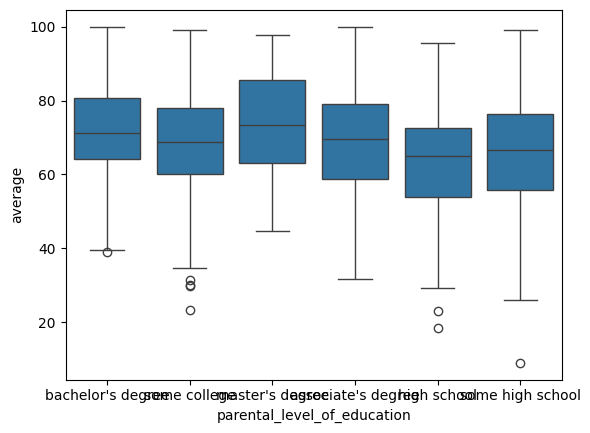

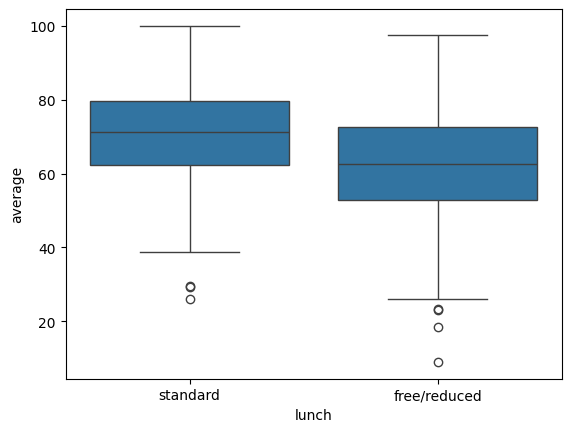

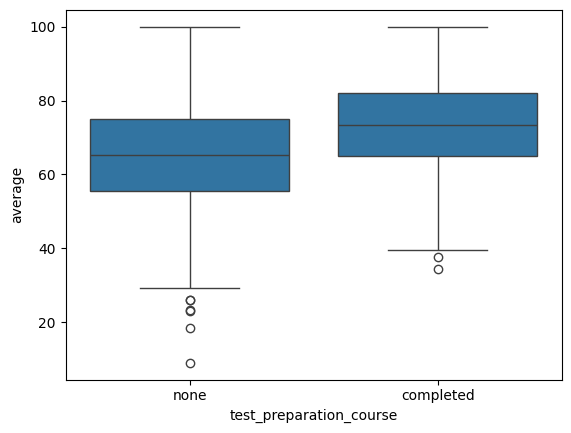

In [60]:
for cat in category:
    sns.boxplot(x=cat, y='average', data=df)
    plt.show()

In [61]:
# Top ranking students
for subject in numerical:
    count_full = df[df[subject] == 100]['average'].count()
    print(f"Number of students with full score in {subject}: {count_full}")

Number of students with full score in math_score: 7
Number of students with full score in reading_score: 17
Number of students with full score in writing_score: 14


In [62]:
# Buttom ranking students
for subject in numerical:
    count_full = df[df[subject] <= 20]['average'].count()
    print(f"Number of students with buttom score in {subject}: {count_full}")

Number of students with buttom score in math_score: 4
Number of students with buttom score in reading_score: 1
Number of students with buttom score in writing_score: 3


1. From above values we get students have performed the worst in Maths
2. Best performance is in reading section

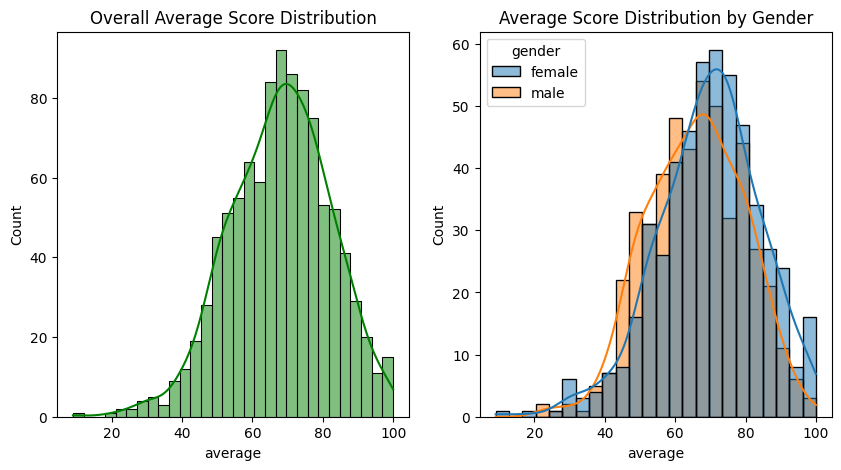

In [69]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.title('Overall Average Score Distribution')

plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.title('Average Score Distribution by Gender')

plt.show()

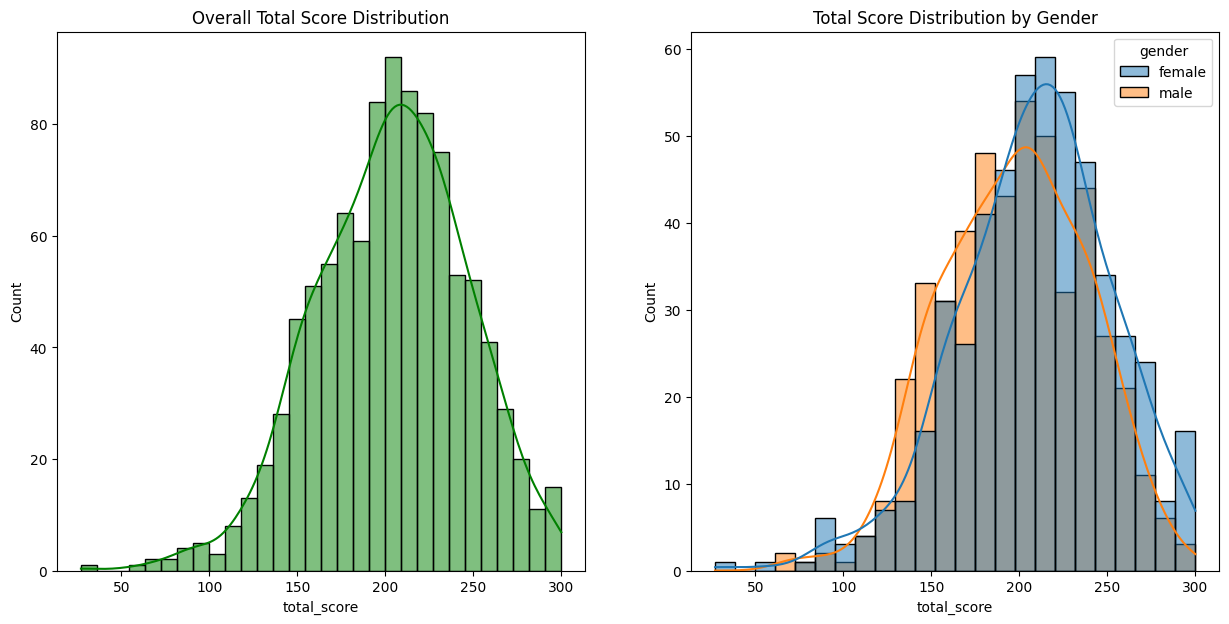

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.title('Overall Total Score Distribution')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.title('Total Score Distribution by Gender')
plt.show()

Female students tend to perform well then male students.

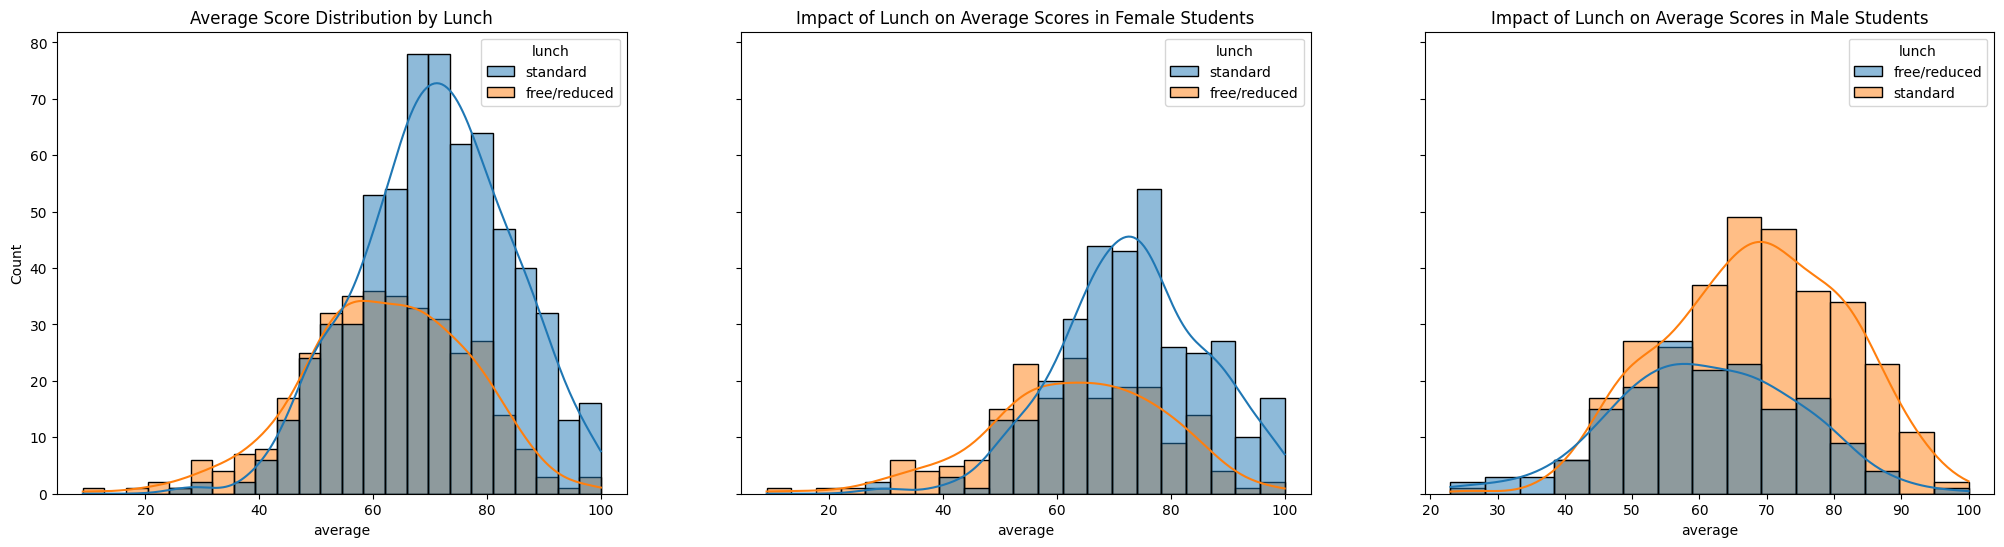

In [ ]:
plt.subplots(1,3,figsize=(25,6),)
plt.subplot(131)
sns.histplot(data=df,x='average', kde=True,hue='lunch')
plt.title('Average Score Distribution by Lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average', kde=True,hue='lunch')
plt.title('Impact of Lunch on Average Scores in Female Students')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True,hue='lunch')
plt.title('Impact of Lunch on Average Scores in Male Students')
plt.show()

Consuming lunch contributes to achieving elevated average scores.

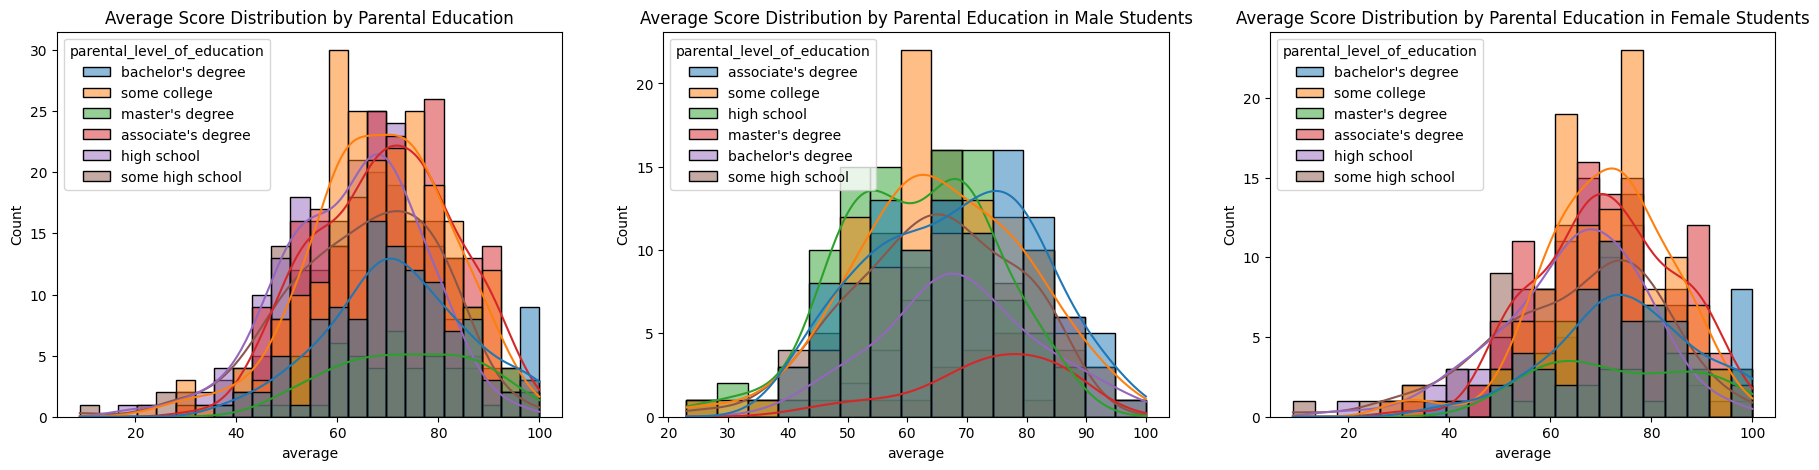

In [33]:
plt.subplots(1,3,figsize=(30,5))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.title('Average Score Distribution by Parental Education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Average Score Distribution by Parental Education in Male Students')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Average Score Distribution by Parental Education in Female Students')
plt.show()

1. Generally, the education of the parent does not assist the student perform well on the exam.
2. The second plot illustrates that male children of parents with associate's or master's degrees tend to perform well on exams.
3. In the third plot, it is evident that the education of the parents does not have any impact on the academic performance of female students.

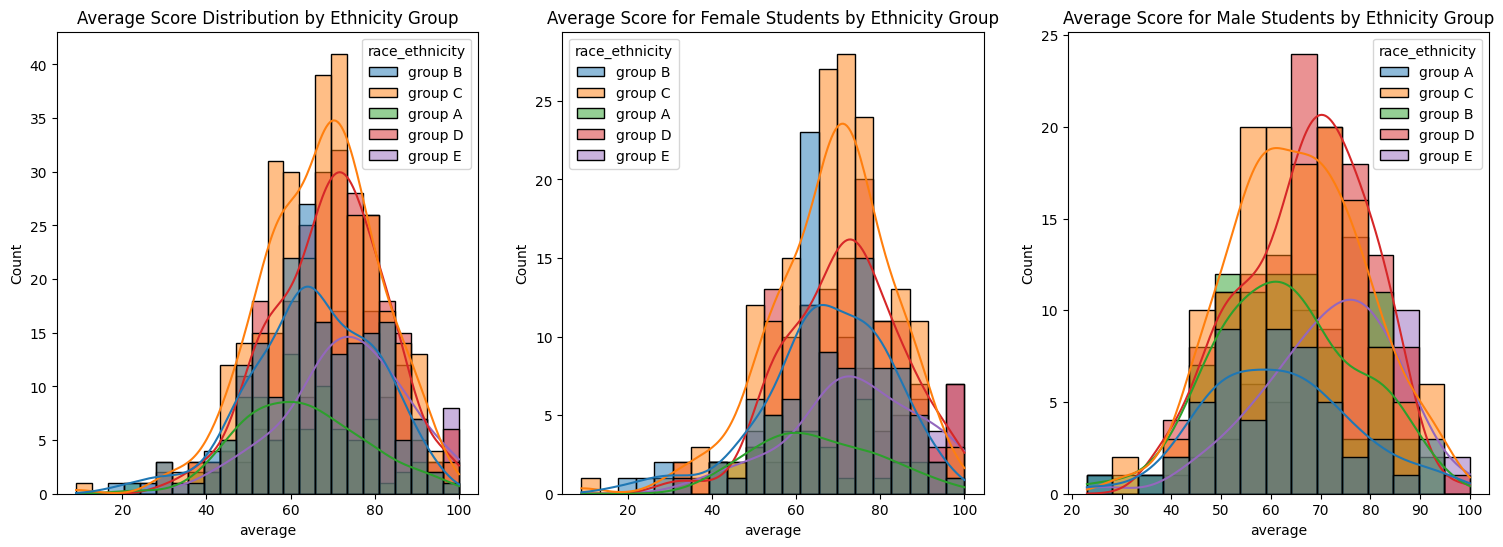

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.title('Average Score Distribution by Ethnicity Group')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.title('Average Score for Female Students by Ethnicity Group')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.title('Average Score for Male Students by Ethnicity Group')
plt.show()

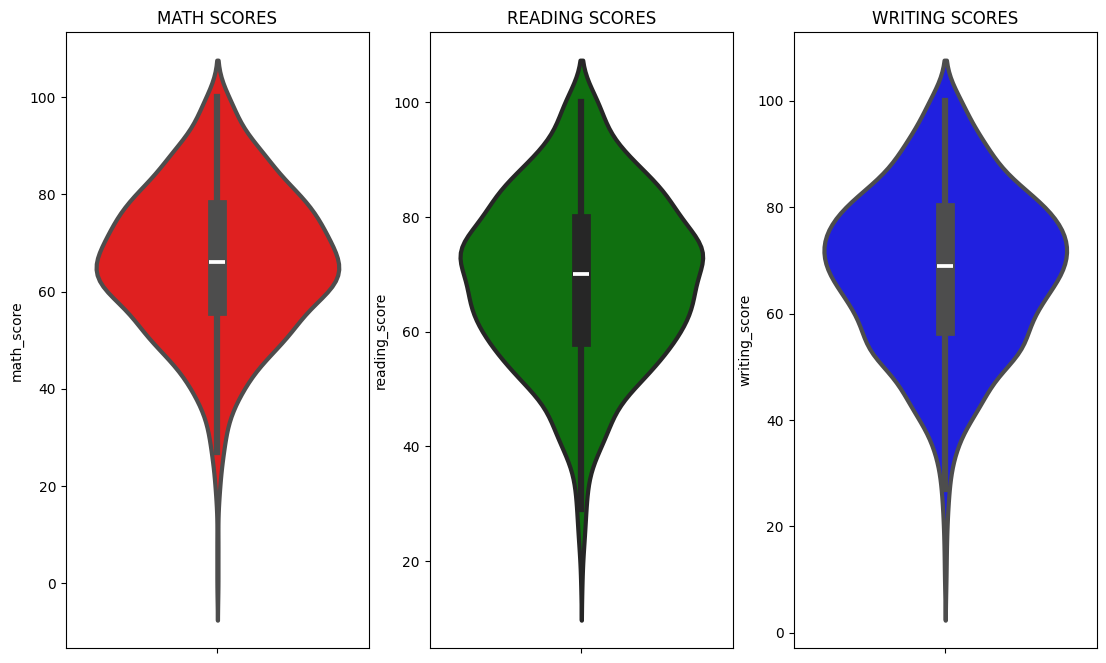

In [38]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()